In [68]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore')

## Cleaning data

In [69]:
df = pd.read_excel('online_retail_II.xlsx')

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 

Description: Product (item) name. Nominal. 

Quantity: The quantities of each product (item) per transaction. Numeric.	

InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated. 

UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£). 

CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 

Country: Country name. Nominal. The name of the country where a customer resides.


In [70]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [72]:
round(((df.isna().sum()/ len(df)) * 100), 2)

Invoice         0.00
StockCode       0.00
Description     0.56
Quantity        0.00
InvoiceDate     0.00
Price           0.00
Customer ID    20.54
Country         0.00
dtype: float64

In [73]:
# deal with NaNs, customer IDs can't be interpolated based on other data
df = df.dropna(axis = 0, subset = ['Customer ID'])
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [74]:
# deal with duplicates
print(df.duplicated().sum())
df = df.drop_duplicates()

6771


<Axes: xlabel='Cancelled'>

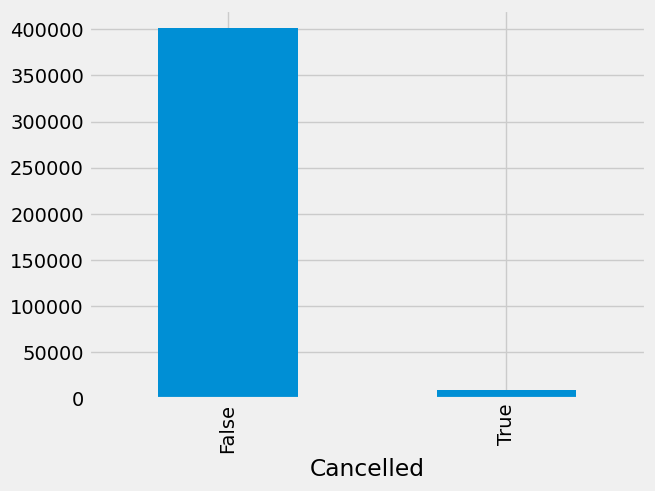

In [75]:
# creating a feature based on whether the transaction was succesfull
df['Cancelled'] = df['Invoice'].str.startswith('C')
df['Cancelled'] = df['Cancelled'].fillna(False)
(df['Cancelled'].value_counts()).plot(kind = 'bar')

In [76]:
# dealing with data types
df['Cancelled'] = df['Cancelled'].astype(bool)
df['Customer ID'] = df['Customer ID'].astype('int')
df['Country'] = df['Country'].astype('category')

In [77]:
# import datetime as dt
# df['InvoiceTime'] = df['InvoiceDate'].dt.time
# df['Year'] = df['InvoiceDate'].dt.year
# df['Month'] = df['InvoiceDate'].dt.month
# df['DayOfMonth'] = df['InvoiceDate'].dt.day

In [78]:
df[df['Quantity'] < 0]['Quantity'].describe()

count    9816.000000
mean      -21.582722
std       212.324392
min     -9360.000000
25%        -6.000000
50%        -2.000000
75%        -1.000000
max        -1.000000
Name: Quantity, dtype: float64

In [79]:
df[df['Cancelled'] == True] # making sure the negative quantity is due to cancellations

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cancelled
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia,True
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia,True
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia,True
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia,True
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia,True
...,...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605,Germany,True
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329,United Kingdom,True
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329,United Kingdom,True
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329,United Kingdom,True


In [80]:
# adding the total amount paid 
df['Total Amount'] = df['Price'] * df['Quantity']

In [81]:
print(f"After cleaning, this dataset contains {len(df)} operations, including {len(df[df['Cancelled'] == True])} of cancelled transactions. \nTotal number of clients is {df['Customer ID'].nunique()}.")

After cleaning, this dataset contains 410763 operations, including 9816 of cancelled transactions. 
Total number of clients is 4383.


## EDA and distributions

In [84]:
sales_by_country = df.groupby('Country')['Total Amount'].sum().reset_index()
fig = px.bar(sales_by_country, x = 'Country', y = 'Total Amount', color='Country', template='seaborn', title='Total Amount by Country')
fig.show()

In [85]:
country_transactions = df.groupby('Country')['Invoice'].nunique().reset_index()
fig = px.bar(country_transactions, x = 'Country', y = 'Invoice', template='seaborn', title='Number of Invoices per Country', \
             labels = {'Invoice': 'Number of transactions', 'Country': 'Country'}, color='Country')
fig.show()


In [101]:
# percentage of return per country
returns_by_country = df[df['Cancelled'] == True].groupby('Country')['Invoice'].nunique().reset_index(name='Returns')
returns_by_country = returns_by_country.merge(country_transactions, on='Country')
returns_by_country['Return Percentage'] = round(((returns_by_country['Returns'] / returns_by_country['Invoice']) * 100), 2)
rbc = returns_by_country.sort_values(by='Return Percentage', ascending=False)
fig = px.bar(rbc, x = 'Return Percentage', y = 'Country', template='seaborn')
fig.show()